<a href="https://colab.research.google.com/github/emitejadaa/NeuroLinked/blob/main/notebooks/stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
path="drive/MyDrive/Colab-Dataset/stars.csv"
import pandas as pd
import numpy as np
df=pd.read_csv(path)
df.head()

,u,g,r,i,class
0,23.87882,22.27530,20.39501,19.16573,0
1,24.77759,22.83188,22.58444,21.16812,0
2,25.26307,22.66389,20.60976,19.34857,0
3,22.13682,23.77656,21.61162,20.50454,0
4,19.43718,17.58028,16.49747,15.97711,0


In [51]:
import sklearn.model_selection

X = df.drop(columns=['class'])
y = df['class']
TEST_SIZE = 0.2

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=2, test_size=TEST_SIZE)

In [52]:
import sklearn
from sklearn.tree import DecisionTreeClassifier

In [62]:
tree=DecisionTreeClassifier(max_depth=7, criterion="entropy")

In [63]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [45]:
def test(x, y):
  print(f'prediction: {tree.predict(x)}')
  print(f'real: {y}')

In [64]:
y_pred = tree.predict(x_test)

print(f"Predicciones:   {y_pred}\nValores reales: {y_test.to_numpy()}")
# Podemos calcular el accuracy (exactitud) comparando los valores predichos contra los reales,
# para ello contamos cuántas coincidencias hubo y dividimos por la cantidad de comparaciones que hicimos:
print(f"Accuracy sobre el test set: {np.mean(y_pred == y_test)}")

#También podemos invocar al método score que viene con los DecisionTreeClassifier
print(f"Accuracy sobre el test set: {tree.score(x_test, y_test)}")

print(f"Score sobre el training set: {tree.score(x_train, y_train):.2f} ¿qué indica este número?")

Predicciones:   [1 0 0 2 0 0 0 0 0 2 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 2 0 1 0 2 0 2 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 2 1
 0 0 1 0 0 0 0 0 0 0 0 1 1 2 0 2 1 1 0 2 0 0 1 1 2 0 1 2 0 0 0 0 1 1 0 1 2
 2 0 1 2 0 2 0 0 2 0 0 0 2 0 1 0 0 0 2 0 1 0 0 2 1 0 0 0 2 0 1 2 2 1 2 0 1
 1 0 0 0 1 2 2 1 0 1 1 1 0 0 0 0 2 1 1 0 2 0 2 1 2 2 0 1 1 2 0 0 0 2 1 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 2 0 2 0 2 1 2 0 2 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 2 0 0 0 1 0 0 0 1 0 0 0 0 0 2 0 1 2 1 0 1 0 0 0 2 0 1 1 0 2 0 2 0
 2 0 0 1 2 0 1 1 0 0 1 0 1 0 0 1 2 0 0 0 2 0 0 0 0 0 2 2 0 0 0 1 0 2 1 0 1
 0 2 2 0 1 1 2 0 1 0 0 0 0 1 1 0 1 0 0 2 0 2 0 0 0 0 0 0 1 0 2 0 1 2 1 1 0
 1 1 0 0 0 2 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 2 2 0 0 0 0 0 0 0 1 0
 0 0 2 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 2 1 0 0 0 0 1 0 0 0 0 2 0 2 0 1 1 0
 0 0 1 0 2 1 1 0 2 1 0 0 0 0 0 0 0 0 0 2 0 0 0 1 2 1 0 2 0 0 1 0 1 0 2 0 1
 0 0 0 1 1 2 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 2 2 0 0 0 0 0 1 0 1 0 0 1 2 0 0
 2 1 1 1 

In [60]:
import matplotlib.pyplot as plt


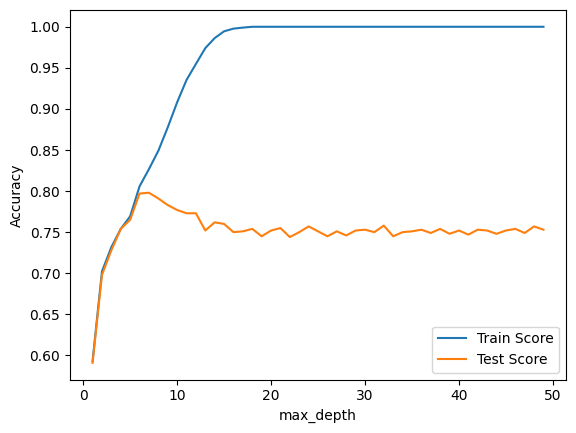

In [66]:
max_depths = range(1, 50)
train_scores = []
test_scores = []
for max_depth in max_depths:
    arbol = DecisionTreeClassifier(max_depth=max_depth, criterion="entropy")
    arbol.fit(x_train, y_train)
    train_scores.append(arbol.score(x_train, y_train))
    test_scores.append(arbol.score(x_test, y_test))
plt.plot(max_depths, train_scores, label='Train Score')
plt.plot(max_depths, test_scores, label='Test Score')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()